### Amazon CoPurchase Dataset

This is a dataset provided by Stanford's SNAP (Stanford Network Analysis Program). This dataset an an Amazon product copurchasing network, 400,727 purchases from March 12, 2003 (simpler times, Amazon's purchases today would crash my computer). I'm really interested in purchasing behaviors, networks, and reccommender systems, so this dataset is a good start to practicing with the Python NetworkX library.

In [3]:
!pip install NetworkX

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gzip

In [3]:
G = nx.DiGraph()

In [99]:
fh = gzip.open('amazon0302.txt.gz', 'r')

In [100]:
linelist = []

for line in fh.readlines()[4:]:
    line = line.decode()
    line = line.split('\r\n')
    line = line[0]
    line = line.split('\t')
    linelist.append(line)

In [101]:
df = pd.DataFrame(linelist)

In [103]:
df = df.rename(columns = {0:'input', 1:'next purchase'})

In [117]:
###I tried to graph the entire dataset and my poor computer couldn't handle it
smalldf = df[:100]

In [118]:
FG = nx.from_pandas_edgelist(smalldf, source='input', target='next purchase', edge_attr=True)

In [119]:
FG.nodes()

NodeView(('0', '1', '2', '3', '4', '5', '15', '11', '12', '13', '14', '63', '64', '65', '66', '67', '7', '16', '17', '18', '19', '6', '8', '9', '10', '20', '30', '290', '21', '22', '23', '24', '137', '138', '139', '25', '26', '260', '261', '262', '263', '264', '140', '141', '27', '28', '29', '68', '69', '70', '71', '72', '73', '75', '31', '32', '33', '34', '35', '36', '74'))

In [120]:
FG.edges()

EdgeView([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '4'), ('1', '5'), ('1', '15'), ('2', '11'), ('2', '12'), ('2', '13'), ('2', '14'), ('3', '63'), ('3', '64'), ('3', '65'), ('3', '66'), ('3', '67'), ('4', '7'), ('4', '16'), ('4', '17'), ('4', '18'), ('4', '19'), ('5', '6'), ('5', '7'), ('5', '8'), ('5', '9'), ('5', '10'), ('15', '68'), ('15', '69'), ('15', '70'), ('15', '71'), ('15', '72'), ('11', '6'), ('11', '9'), ('11', '20'), ('11', '25'), ('11', '26'), ('12', '260'), ('12', '261'), ('12', '262'), ('12', '263'), ('12', '264'), ('13', '8'), ('13', '20'), ('13', '21'), ('13', '23'), ('13', '140'), ('13', '141'), ('13', '14'), ('14', '21'), ('14', '27'), ('14', '28'), ('14', '29'), ('7', '6'), ('7', '8'), ('7', '9'), ('7', '30'), ('7', '290'), ('7', '10'), ('7', '16'), ('7', '17'), ('7', '20'), ('16', '19'), ('16', '73'), ('16', '75'), ('17', '6'), ('17', '8'), ('17', '30'), ('17', '31'), ('18', '32'), ('18', '33'), ('18', '34'), ('18', '35'), ('18

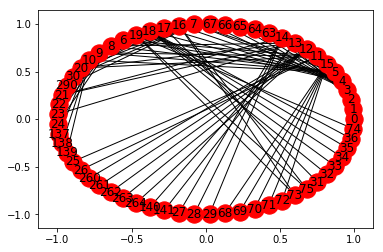

In [122]:
nx.draw_networkx(FG, pos=nx.shell_layout(FG))

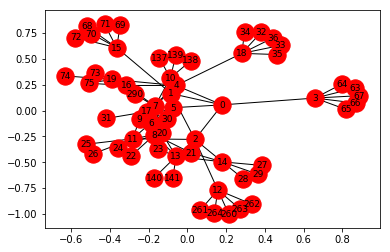

In [135]:
nx.draw_networkx(FG, font_size=9, pos=nx.spring_layout(FG))

I think the spring layout does a better job of showing which products are related, but without product names these graphs aren't too helpful.